In [139]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 3. ND Network: Hopfield neural network

system is $ \frac {dx(t)}{dt} = - \textbf{x}(t) + f(W\textbf{s}(t)) + \sigma \eta(t)$

In [140]:
dt = 0.1

sigma = 0.1

x = np.array([np.random.choice([1, -1], 64)]).reshape(64, 1)

## 3.1 Invent a pattern:

p is a 64 dim vecor; each component $p_i$ of this pattern should take either the value -1 or 1. map it to an 8 x 8 matrix and visualize

64

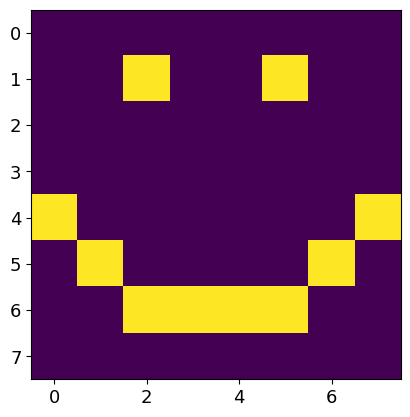

In [141]:
np.random.seed(0)

p = np.array([[-1, -1, -1, -1, -1, -1, -1, -1],
             [-1, -1, 1, -1, -1, 1, -1, -1],
             [-1, -1, -1, -1, -1, -1, -1, -1],
             [-1, -1, -1, -1, -1, -1, -1, -1],
             [1, -1, -1, -1, -1, -1, -1, 1],
             [-1, 1, -1, -1, -1, -1, 1, -1],
             [-1, -1, 1, 1, 1, 1, -1, -1],
             [-1, -1, -1, -1, -1, -1, -1, -1]])

plt.imshow(p)
p = p.reshape(64, 1)
len(p)

## 3.2 Plot W and simulate the dynamics 

Compute and plot the matrix W, as descrbied above. Simulate the network eith stepwidth $dt = 0.1$ using random initial conds. 

$W  = \frac {1}{N}\textbf{pp}^T$

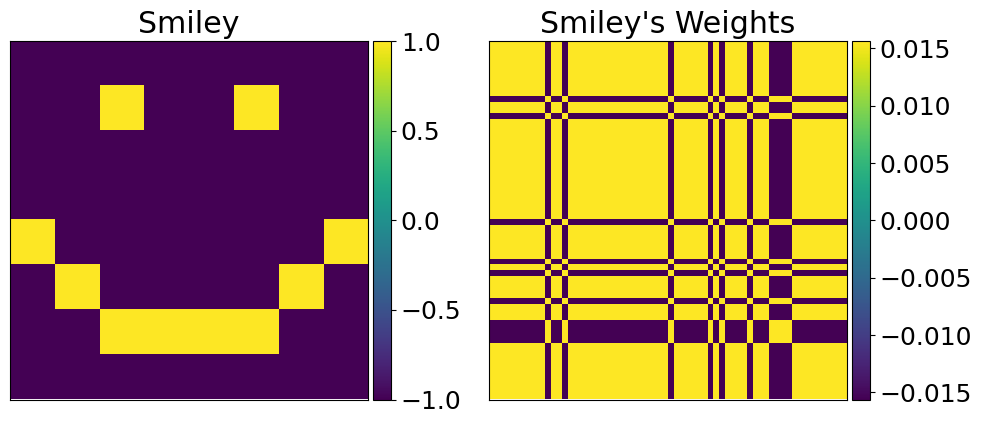

In [142]:
np.random.seed(0)
W = 1/64 * p @ p.T

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.rcParams.update({'font.size': 18})

divider_1 = make_axes_locatable(ax1)
divider_2 = make_axes_locatable(ax2)
cax_1 = divider_1.append_axes('right', size='5%', pad=0.05)
cax_2 = divider_2.append_axes('right', size='5%', pad=0.05)

im_1 = ax1.imshow(p.reshape(8, 8), cmap='viridis') #plot it
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Smiley")


im_2 = ax2.imshow(W, cmap='viridis')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Smiley's Weights")

fig.colorbar(im_1, cax=cax_1, orientation='vertical')
fig.colorbar(im_2, cax=cax_2, orientation='vertical')
fig.tight_layout()

fig.savefig('smiley_weights.png')


In [143]:
def hoppfield_generator(W, x, sigma, dt,  iterations=15) -> dict:
    '''This function generates a sequence of Hoppfield plots given a weight
    Matrix, a column vector of initial values, a noise term, and a step size.
    
    Default iterations is 15
    
    Returns a dictionary of hoppfield states indexed by their iteration number''' 

    N = len(x)

    states = {}
    i = 0

    while i < iterations:
        if i == 0:
           x = x.reshape(int(np.sqrt(N)), int(np.sqrt(N)))
           
        else:
            dxdt = -x + np.sign(W @ x) + sigma * np.random.normal()
            x = x + dxdt * dt
            x = x.reshape(int(np.sqrt(N)), int(np.sqrt(N)))
        
        states[i] = x
        x = x.reshape(N, 1)
        i += 1
    
    return states 

In [144]:
# np.isclose(hoppfield_generator(W, p, sigma, dt, iterations=1000)[999].round(2), p.reshape(8, 8), atol=1e-2)
# hoppfield_generator(W, p_corrupt, sigma, dt, iterations=100)[25].round(1) == p.reshape(8, 8)
#plt.imshow(hoppfield_generator(W, p_corrupt, sigma, dt, iterations=100)[25])

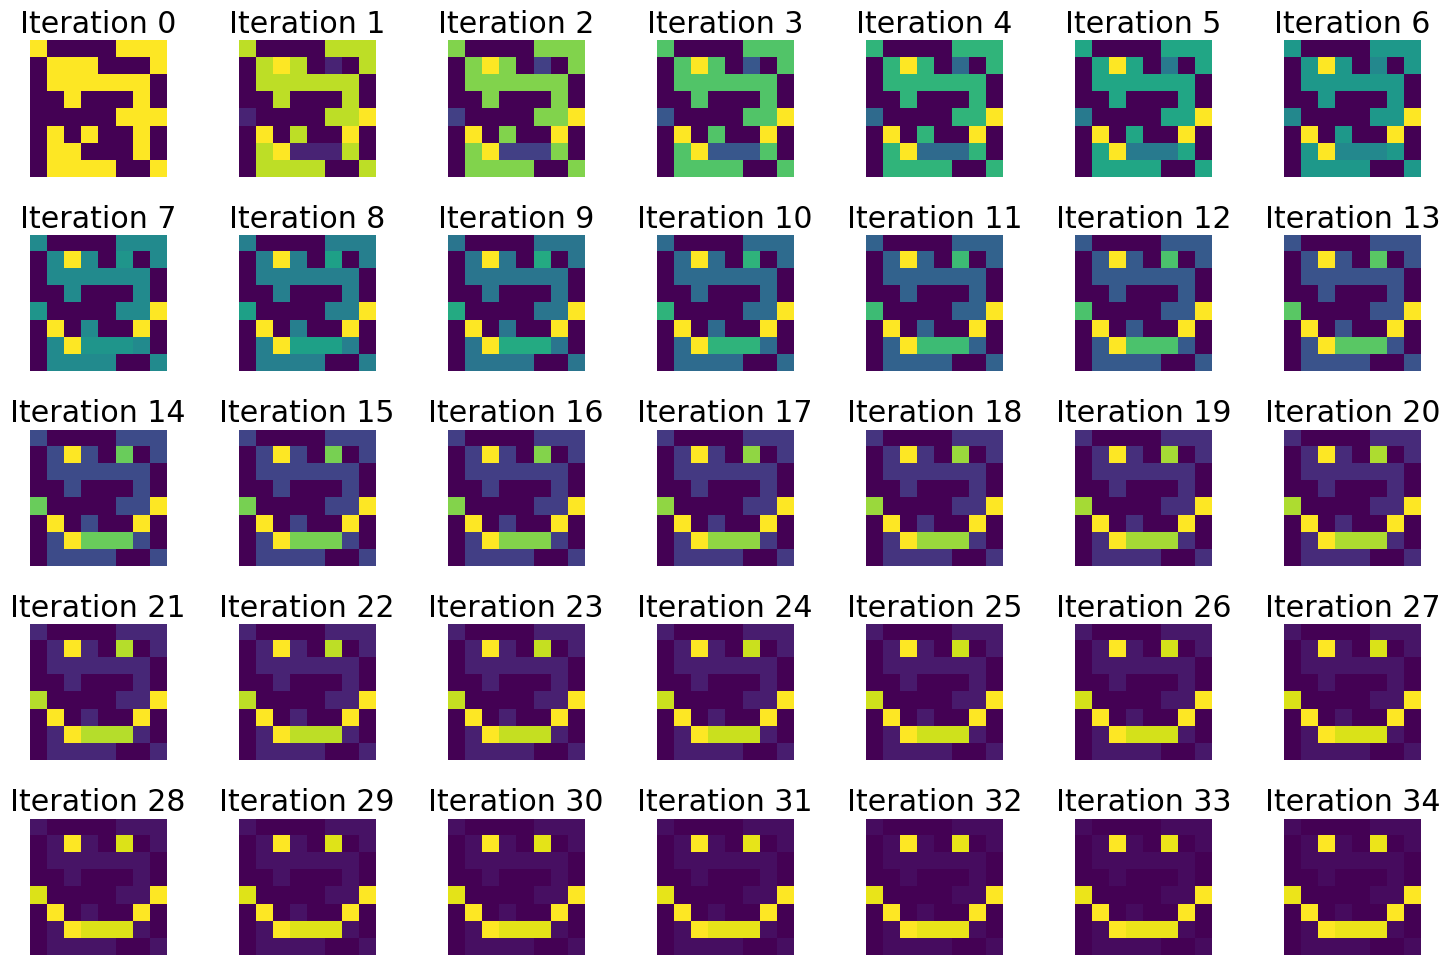

In [145]:
#Loop for more iterations

hoppfield_smiley = hoppfield_generator(W, x, sigma, dt, iterations=35)

fig, ax = plt.subplots(5, 7, figsize=(15, 10))
plt.rcParams.update({'font.size': 18})
for i in range(5):
    for j in range(7):
        ax[i, j].imshow(hoppfield_smiley[i*7 + j], cmap='viridis')
        ax[i, j].set_title(f'Iteration {i*7 + j}')
        ax[i, j].axis('off')
fig.tight_layout()
fig.savefig('smiley_itterated.png')

## 3.4 Introduce a new pattern

Try to create a second patter $\textbf{q}$

Weight Matrix:

$$W = \frac{1}{N}(\textbf{p}\textbf{p}^T + \textbf{q}\textbf{q}^T)$$

64

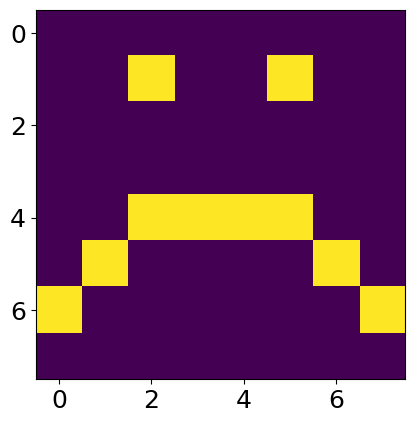

In [146]:
q = np.array([[-1, -1, -1, -1, -1, -1, -1, -1],
             [-1, -1, 1, -1, -1, 1, -1, -1],
             [-1, -1, -1, -1, -1, -1, -1, -1],
             [-1, -1, -1, -1, -1, -1, -1, -1],
             [-1, -1, 1, 1, 1, 1, -1, -1],
             [-1, 1, -1, -1, -1, -1, 1, -1],
             [1, -1, -1, -1, -1, -1, -1, 1],
             [-1, -1, -1, -1, -1, -1, -1, -1]])
plt.imshow(q)
q = q.reshape(64, 1)
len(q)

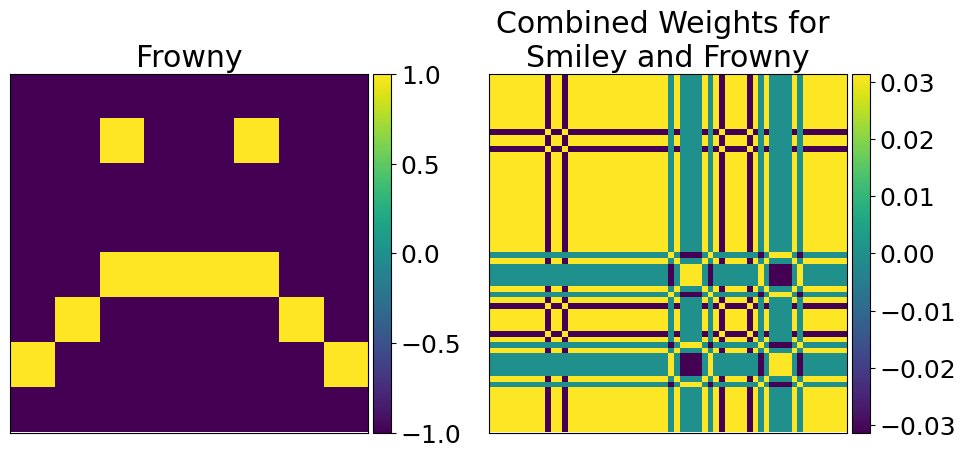

In [147]:
W_2 = 1/64 * (np.outer(p, p.T) + np.outer(q, q.T))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.rcParams.update({'font.size': 18})
divider_1 = make_axes_locatable(ax1)
divider_2 = make_axes_locatable(ax2)
cax_1 = divider_1.append_axes('right', size='5%', pad=0.05)
cax_2 = divider_2.append_axes('right', size='5%', pad=0.05)

im_1 = ax1.imshow(q.reshape(8,8), cmap='viridis') #plot it
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Frowny")

im_2 = ax2.imshow(W_2, cmap='viridis')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Combined Weights for \nSmiley and Frowny")

fig.colorbar(im_1, cax=cax_1, orientation='vertical')
fig.colorbar(im_2, cax=cax_2, orientation='vertical')
fig.tight_layout()

fig.savefig('frowny_weights.png')


In [148]:
#frowny seed
np.random.seed(0)
x_1 = np.array([np.random.choice([1, -1], 64)]).reshape(64, 1)

In [149]:
#smiley seed
np.random.seed(15)
x_2 = np.array([np.random.choice([1, -1], 64)]).reshape(64, 1)

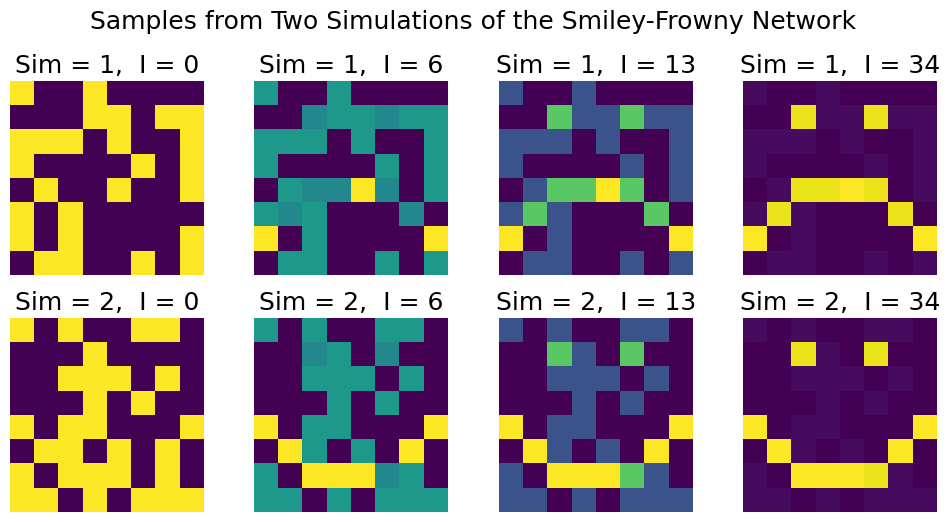

In [150]:
hoppfield_fsf = hoppfield_generator(W_2, x_1, sigma, dt, iterations=35)
hoppfield_fss = hoppfield_generator(W_2, x_2, sigma, dt, iterations=35)

plt.rcParams.update({'font.size': 15})
fig, (ax1, ax2) = plt.subplots(2, 4, figsize=(10, 5))

ax1[0].imshow(hoppfield_fsf[0], cmap='viridis')
ax1[0].axis('off')
ax1[0].set_title('Sim = 1,  I = 0')

ax1[1].imshow(hoppfield_fsf[6], cmap='viridis')
ax1[1].axis('off')
ax1[1].set_title('Sim = 1,  I = 6')

ax1[2].imshow(hoppfield_fsf[13], cmap='viridis')
ax1[2].axis('off')
ax1[2].set_title('Sim = 1,  I = 13')

ax1[3].imshow(hoppfield_fsf[34], cmap='viridis')
ax1[3].axis('off')
ax1[3].set_title('Sim = 1,  I = 34')

ax2[0].imshow(hoppfield_fss[0], cmap='viridis')
ax2[0].axis('off')
ax2[0].set_title('Sim = 2,  I = 0')

ax2[1].imshow(hoppfield_fss[6], cmap='viridis')
ax2[1].axis('off')
ax2[1].set_title('Sim = 2,  I = 6')

ax2[2].imshow(hoppfield_fss[13], cmap='viridis')
ax2[2].axis('off')
ax2[2].set_title('Sim = 2,  I = 13')

ax2[3].imshow(hoppfield_fss[34], cmap='viridis')
ax2[3].axis('off')
ax2[3].set_title('Sim = 2,  I = 34')

fig.tight_layout()
fig.suptitle('Samples from Two Simulations of the Smiley-Frowny Network', y=1.05)
fig.savefig('smiley_frowny.png', bbox_inches='tight')


Both patterns get memorized!

## 3.5 Giving a corrupt pattern:

Give the network a corrupt pattern as an initial condition and verify that the network recovers the original pattern. i.e., adding noise to $p$ or $q$ and use it as an initial condition

In [151]:
# Corrupting pattern p
p_corrupt = np.array([])
for i, _ in enumerate(p):
    p_corrupt = np.append(p_corrupt, p[i] + np.random.normal())
p_corrupt = p_corrupt.reshape(64, 1)

In [152]:
# corrupting pattern q:
q_corrupt = np.array([])
for i, _ in enumerate(q):
    q_corrupt = np.append(q_corrupt, q[i] + np.random.normal())

q_corrupt = q_corrupt.reshape(64,1) #adding noise to q to corrupt it

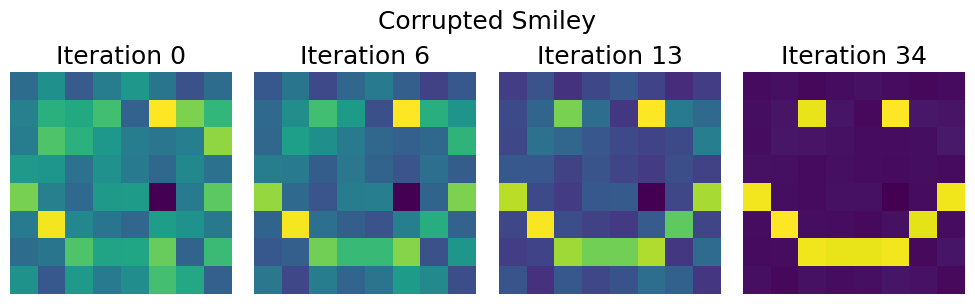

In [153]:
hoppfield_corrupt = hoppfield_generator(W_2, p_corrupt, sigma, dt, iterations=35)

fig, ax = plt.subplots(1, 4, figsize=(10, 5))
plt.rcParams.update({'font.size': 15})
ax[0].imshow(hoppfield_corrupt[0], cmap='viridis')
ax[0].set_title('Iteration 0')
ax[0].axis('off')

ax[1].imshow(hoppfield_corrupt[6], cmap='viridis')
ax[1].set_title('Iteration 6')
ax[1].axis('off')

ax[2].imshow(hoppfield_corrupt[13], cmap='viridis')
ax[2].set_title('Iteration 13')
ax[2].axis('off')

ax[3].imshow(hoppfield_corrupt[34], cmap='viridis')
ax[3].set_title('Iteration 34')
ax[3].axis('off')

fig.suptitle('Corrupted Smiley', y=0.8)

fig.tight_layout()
fig.savefig('corrupted_p.png', bbox_inches='tight')

### Many Patterns

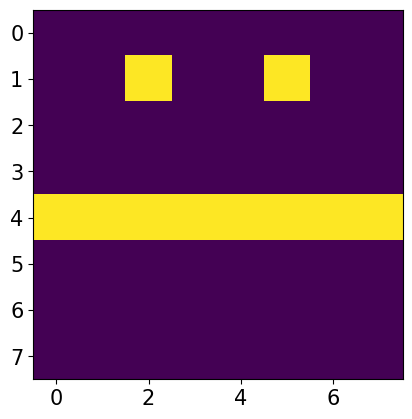

In [154]:
# neutral
r = np.array([[-1, -1, -1, -1, -1, -1, -1, -1],
              [-1, -1, 1, -1, -1, 1, -1, -1],
              [-1, -1, -1, -1, -1, -1, -1, -1],
              [-1, -1, -1, -1, -1, -1, -1, -1],
              [1, 1, 1, 1, 1, 1, 1, 1],
              [-1, -1, -1, -1, -1, -1, -1, -1],
              [-1, -1, -1, -1, -1, -1, -1, -1],
              [-1, -1, -1, -1, -1, -1, -1, -1]])

plt.imshow(r)

r = r.reshape(64, 1)

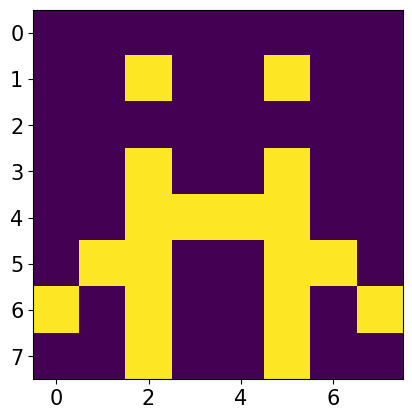

In [155]:
#sad
s = np.array([[-1, -1, -1, -1, -1, -1, -1, -1],
              [-1, -1, 1, -1, -1, 1, -1, -1],
              [-1, -1, -1, -1, -1, -1, -1, -1],
              [-1, -1, 1, -1, -1, 1, -1, -1],
              [-1, -1, 1, 1, 1, 1, -1, -1],
              [-1, 1, 1, -1, -1, 1, 1, -1],
              [1, -1, 1, -1, -1, 1, -1, 1],
              [-1, -1, 1, -1, -1, 1, -1, -1]])

plt.imshow(s)

s = s.reshape(64, 1)

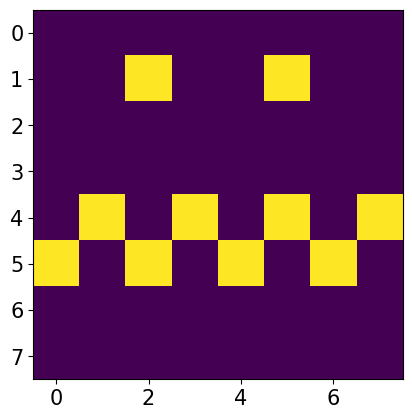

In [156]:
#scared
t = np.array([[-1, -1, -1, -1, -1, -1, -1, -1],
              [-1, -1, 1, -1, -1, 1, -1, -1],
              [-1, -1, -1, -1, -1, -1, -1, -1],
              [-1, -1, -1, -1, -1, -1, -1, -1],
              [-1, 1, -1, 1, -1, 1, -1, 1],
              [1, -1, 1, -1, 1, -1, 1, -1],
              [-1, -1, -1, -1, -1, -1, -1, -1],
              [-1, -1, -1, -1, -1, -1, -1, -1]])

plt.imshow(t)

t = t.reshape(64, 1)

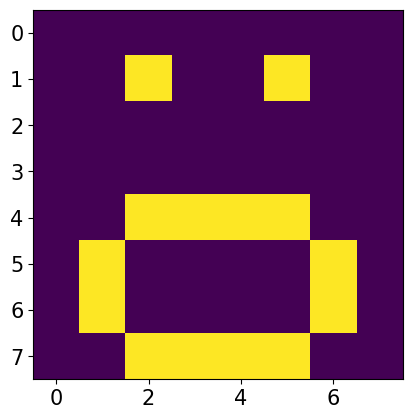

In [157]:
#surprised
j = np.array([[-1, -1, -1, -1, -1, -1, -1, -1],
              [-1, -1, 1, -1, -1, 1, -1, -1],
              [-1, -1, -1, -1, -1, -1, -1, -1],
              [-1, -1, -1, -1, -1, -1, -1, -1],
              [-1, -1, 1, 1, 1, 1, -1, -1],
              [-1, 1, -1, -1, -1, -1, 1, -1],
              [-1, 1, -1, -1, -1, -1, 1, -1],
              [-1, -1, 1, 1, 1, 1, -1, -1]])

plt.imshow(j)

j = j.reshape(64, 1)

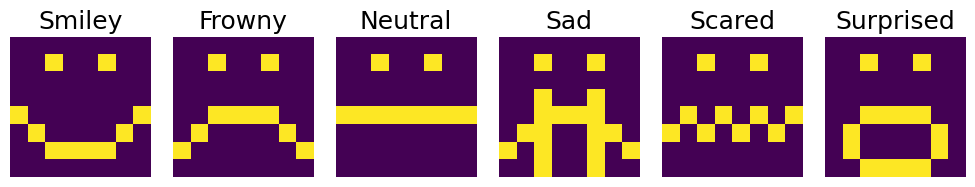

In [158]:
fig, ax = plt.subplots(1, 6, figsize=(10, 5))
plt.rcParams.update({'font.size': 15})
ax[0].imshow(p.reshape(8, 8), cmap='viridis')
ax[0].set_title('Smiley')
ax[0].axis('off')

ax[1].imshow(q.reshape(8, 8), cmap='viridis')
ax[1].set_title('Frowny')
ax[1].axis('off')

ax[2].imshow(r.reshape(8, 8), cmap='viridis')
ax[2].set_title('Neutral')
ax[2].axis('off')

ax[3].imshow(s.reshape(8, 8), cmap='viridis')
ax[3].set_title('Sad')
ax[3].axis('off')

ax[4].imshow(t.reshape(8, 8), cmap='viridis')
ax[4].set_title('Scared')
ax[4].axis('off')

ax[5].imshow(j.reshape(8, 8), cmap='viridis')
ax[5].set_title('Surprised')
ax[5].axis('off')

fig.tight_layout()
fig.savefig('emotions.png', bbox_inches='tight')


In [159]:
#Randomly generated patterns
rand_patterns = []
for i in range(1000):
    x = np.array([np.random.choice([1, -1], 64)]).reshape(64, 1)
    rand_patterns.append(x)

In [160]:
patterns = [p, q, r, s, t, j]

def storage_test(patterns, sigma, dt, iterations=100) -> int:
    W = np.array([np.zeros(len(patterns[0]))]).reshape(1, len(patterns[0]))
    
    recalled = np.array([])

    for pattern in patterns:
       
      W = W + 1/64 * np.outer(pattern, pattern.T)

      pattern_corrupt = np.array([]) 

      for i, _ in enumerate(pattern):
         pattern_corrupt = np.append(pattern_corrupt, pattern[i] + np.random.normal())
      
      hoppfield = hoppfield_generator(W, pattern_corrupt, sigma, dt, iterations)

      recovered = hoppfield[iterations - 1].round(1) == pattern.reshape(8, 8)
      if recovered.all():
         recalled = np.append(recalled, True)
      else:
         recalled = np.append(recalled, False)

    return np.sum(recalled), W


x_random, W_random = storage_test(rand_patterns, sigma, dt, iterations=1000)
x_emotions, W_emotions = storage_test(patterns, sigma, dt, iterations=1000)

x_random, x_emotions
       

(15.0, 1.0)

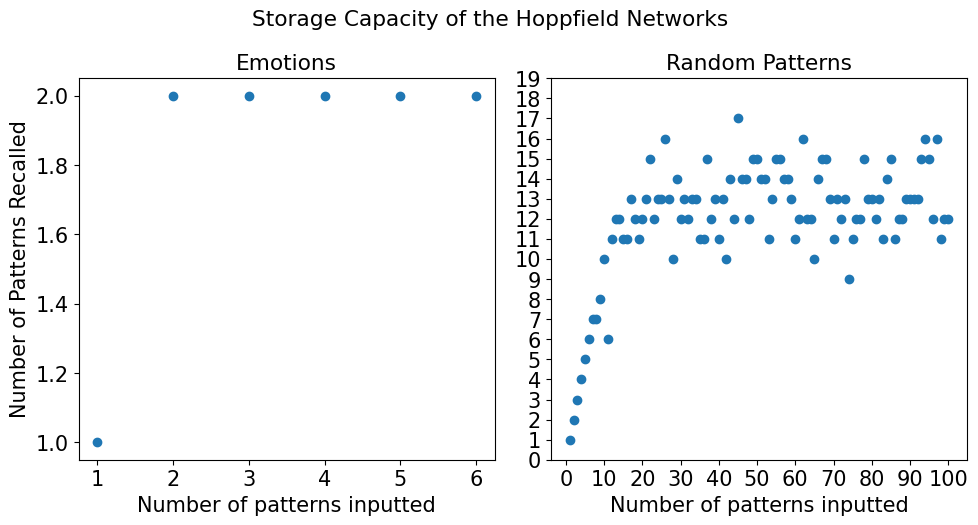

In [161]:
np.random.seed(0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.rcParams.update({'font.size': 13})
rand_patterns_to_test = []
recalled = np.array([])
patterns_stored = np.array([])
for i in patterns:
    rand_patterns_to_test.append(i)

    num_recall, _ = storage_test(rand_patterns_to_test, sigma, dt, iterations=1000)

    recalled = np.append(recalled, num_recall)

    patterns_stored = np.append(patterns_stored, len(rand_patterns_to_test))

ax1.scatter(patterns_stored, recalled)
ax1.set_xticks([1, 2, 3, 4, 5, 6])
ax1.set_ylabel('Number of Patterns Recalled')
ax1.set_xlabel("Number of patterns inputted")
ax1.set_title('Emotions')


rand_patterns_to_test = []
recalled = np.array([])
patterns_stored = np.array([])  
for i in rand_patterns[0: 100]:
    rand_patterns_to_test.append(i)

    num_recall, _ = storage_test(rand_patterns_to_test, sigma, dt, iterations=1000)

    recalled = np.append(recalled, num_recall)

    patterns_stored = np.append(patterns_stored, len(rand_patterns_to_test))

ax2.scatter(patterns_stored, recalled)
ax2.set_xticks(np.arange(0, len(rand_patterns_to_test) + 1, 10))
ax2.set_yticks(np.arange(0, 20, 1))
ax2.set_title('Random Patterns')
ax2.set_xlabel("Number of patterns inputted")


fig.tight_layout()
fig.suptitle('Storage Capacity of the Hoppfield Networks', y=1.05)
fig.savefig('storage_capacity.png', bbox_inches='tight')


## Sorry, I wish it was more interesting but I didn't realize how few of the states it could store until it was too late to redo everything!